### Gradient descent of unknown attractor

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
x = np.array([1/2, 1/2])
x_dot_gt = np.array([2.5, 3.0])  # ground truth
# x_att = np.array([1, 1])     # unknown
x_att_approx = np.array([0.90, 0.90])

gamma_1 = 1/3
gamma_2 = 2/3

A_1 = np.array([[-2, -1], [-1, -3]])
A_2 = np.array([[-4, -2], [-2, -5]])

h = 0.001
epsilon1 = 0.01
epsilon2 = 0.02

T = 200

### approximate gradient

In [3]:
J_list_approx = []

for i in range(T):

    # error
    x_dot = gamma_1 * A_1 @ (x-x_att_approx) + gamma_2 * A_2 @ (x-x_att_approx)
    error = x_dot - x_dot_gt


    # cost function
    J = 1/2 * np.dot(error, error)
    J_list_approx.append(J)


    # approximate gradient
    df_dx = gamma_1 * A_1 @ (x-x_att_approx-np.array([h, 0])) + gamma_2 * A_2 @ (x-x_att_approx-np.array([h, 0]))
    df_dx -= gamma_1 * A_1 @ (x-x_att_approx+np.array([h, 0])) + gamma_2 * A_2 @ (x-x_att_approx+np.array([h, 0]))
    df_dx /= 2*h
    dJ_dx = np.dot(error, df_dx)


    df_dy = gamma_1 * A_1 @ (x-x_att_approx-np.array([0, h])) + gamma_2 * A_2 @ (x-x_att_approx-np.array([0, h]))
    df_dy -= gamma_1 * A_1 @ (x-x_att_approx+np.array([0, h])) + gamma_2 * A_2 @ (x-x_att_approx+np.array([0, h]))
    df_dy /= 2*h
    dJ_dy = np.dot(error, df_dy)


    # update parameter
    x_att_approx -= epsilon1 * np.array([dJ_dx, 0]) 
    x_att_approx -= epsilon1 * np.array([0, dJ_dy]) 



print(x_att_approx)


[0.99999789 1.00000157]


### exact gradient

In [4]:
x_att_approx = np.array([0.90, 0.90])
J_list_analy = []


for i in range(T):

    # error
    x_dot = gamma_1 * A_1 @ (x-x_att_approx) + gamma_2 * A_2 @ (x-x_att_approx)
    error = x_dot - x_dot_gt


    # cost function
    J = 1/2 * np.dot(error, error)
    J_list_analy.append(J)


    # analytical gradient
    df_dxy = np.array([gamma_1 * A_1 @ (-np.array([1, 0])) + gamma_2 * A_2 @ (-np.array([1, 0])),
             gamma_1 * A_1 @ (-np.array([0, 1])) + gamma_2 * A_2 @ (-np.array([0, 1])) 
             ])

    dJ_dxy = np.array([np.dot(error, df_dxy[0]), np.dot(error, df_dxy[1])])

    x_att_approx -= epsilon2 * dJ_dxy


print(x_att_approx)


[1. 1.]


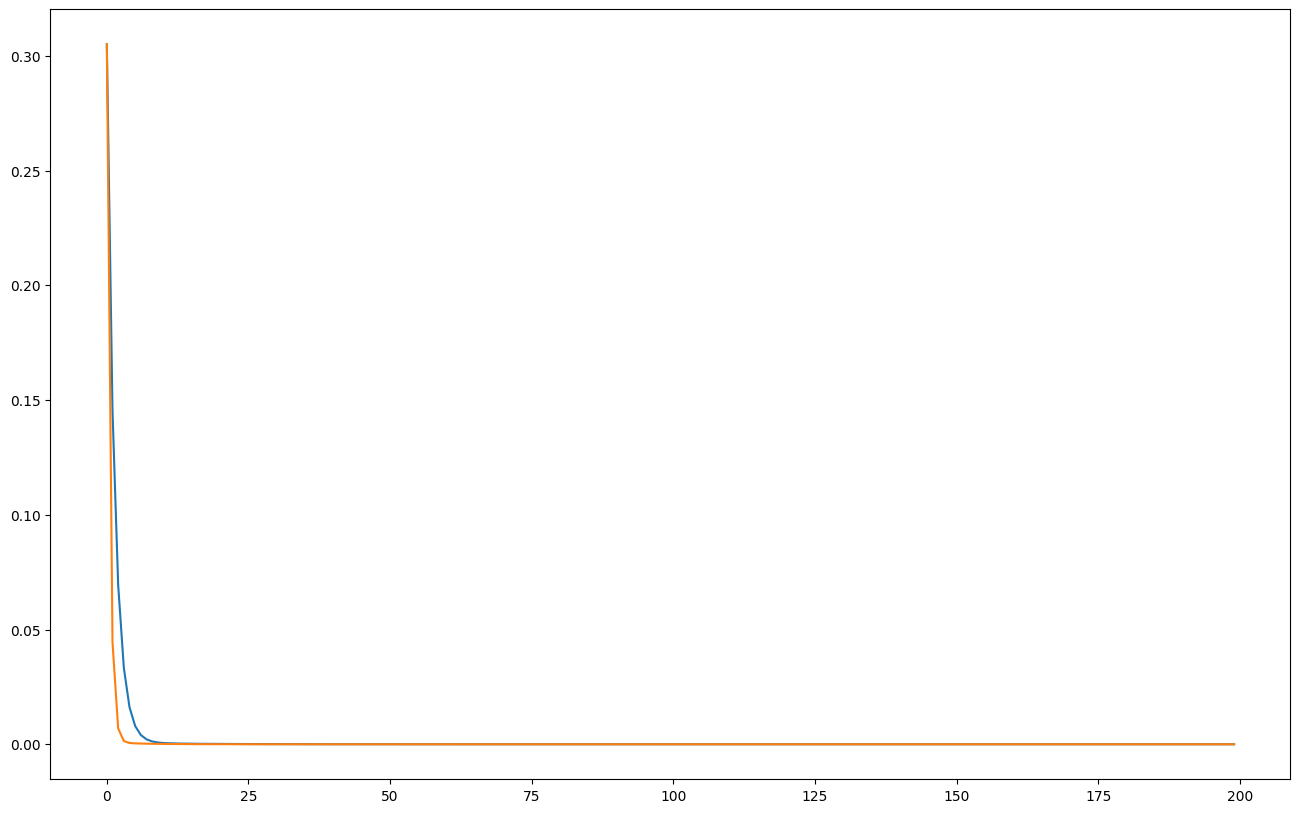

In [5]:
# plot result

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot()

ax.plot(np.arange(len(J_list_approx)), J_list_approx)
ax.plot(np.arange(len(J_list_analy)), J_list_analy)

plt.show()